### Example 3.21 (Diagonals and Multiple Laurent Expansions)
Compute and plot points on the contour of an amoeba, and examine terms in two Laurent expansions.  
*Requirements: None*

In [1]:
# Define the polynomial under consideration and the system defining contour points
var('x,y,t')
R = 1-x-y-x*y^3
sys = [R,diff(R,x)*x-t*diff(R,y)*y]
sys

[-x*y^3 - x - y + 1, (3*x*y^2 + 1)*t*y - (y^3 + 1)*x]

In [2]:
# Parametrize the contour by Pyt(y,t) = 0 and x = R(y,t), 
# where Pyt is a polynomial and R is a rational function
J = PolynomialRing(QQbar,3,'x,y,t',order='lex')
GB = J.ideal([J(k) for k in sys]).groebner_basis()
Pyt = GB[-1]
X = SR(GB[-2]).solve(x)[0].rhs()

print("At a point of the contour y and t are roots of")
show(Pyt)
print("and x = {}".format(X))

At a point of the contour y and t are roots of


y^4*t + (-1/2)*y^4 + (-3/2)*y^3*t + 1/2*y^3 + (-1/2)*y*t + (-1/2)*y + 1/2

and x = -1/3*((2*t - 1)*y - 3*t + 1)/t


In [3]:
# Determine the "bad" values of t, which cause the denominator of x to be zero
bad = [k.rhs() for k in X.denominator().solve(t,multiplicities=false)]

In [4]:
# Find points on the contour when t lies between -5 and 5
pt = plot([])
for tt in range(-500,500):
    T = tt/100
    if T not in bad:
        ys = CC['y'](Pyt.subs(t=T)).roots(multiplicities=false)
        for k in ys:
            xs = X.subs(y=k,t=T)
            pt += point([log(abs(xs)),log(abs(k))])

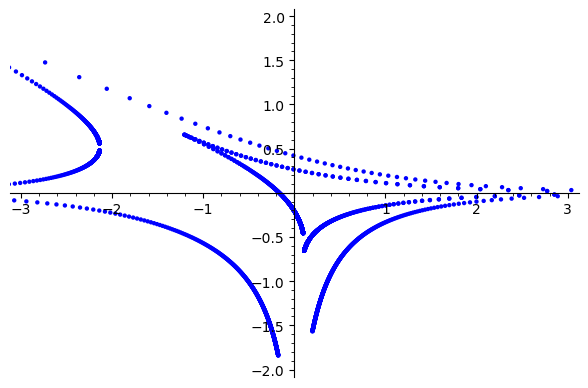

In [5]:
# Plot the computed points on the contour
show(pt, xmin=-3, xmax=3, ymin=-2, ymax=2)

In [6]:
# The power series expansion of 1/R begins
(1/R).taylor((x,0),(y,0),10)

x^10 + 10*x^9*y + 45*x^8*y^2 + 127*x^7*y^3 + 252*x^6*y^4 + 357*x^5*y^5 + 356*x^4*y^6 + 237*x^3*y^7 + 93*x^2*y^8 + 17*x*y^9 + y^10 + x^9 + 9*x^8*y + 36*x^7*y^2 + 90*x^6*y^3 + 156*x^5*y^4 + 186*x^4*y^5 + 147*x^3*y^6 + 69*x^2*y^7 + 15*x*y^8 + y^9 + x^8 + 8*x^7*y + 28*x^6*y^2 + 61*x^5*y^3 + 90*x^4*y^4 + 86*x^3*y^5 + 49*x^2*y^6 + 13*x*y^7 + y^8 + x^7 + 7*x^6*y + 21*x^5*y^2 + 39*x^4*y^3 + 47*x^3*y^4 + 33*x^2*y^5 + 11*x*y^6 + y^7 + x^6 + 6*x^5*y + 15*x^4*y^2 + 23*x^3*y^3 + 21*x^2*y^4 + 9*x*y^5 + y^6 + x^5 + 5*x^4*y + 10*x^3*y^2 + 12*x^2*y^3 + 7*x*y^4 + y^5 + x^4 + 4*x^3*y + 6*x^2*y^2 + 5*x*y^3 + y^4 + x^3 + 3*x^2*y + 3*x*y^2 + y^3 + x^2 + 2*x*y + y^2 + x + y + 1

In [7]:
# The power series diagonal sequence starts
ser = QQ[x,y]((1/R).taylor((x,0),(y,0),21))
[ser[k,k] for k in range(10)]

[1, 2, 6, 23, 90, 357, 1443, 5910, 24426, 101669]

In [8]:
# Similarly, the Laurent expansion of 1/R when 1 + |x| + |xy^3| < |y| has terms
(-1/y * add([((1-x-x*y^3)/y)^k for k in range(5)])).expand()

-x^4*y^7 - 4*x^4*y^4 + x^3*y^5 + 4*x^3*y^4 - 6*x^4*y + 3*x^3*y^2 - x^2*y^3 + 12*x^3*y - 3*x^2*y^2 - 6*x^2*y - 2*x^2 - 4*x^4/y^2 + 3*x^3/y + x*y + 2*x + 12*x^3/y^2 - 6*x^2/y - 12*x^2/y^2 + 3*x/y - x^4/y^5 + x^3/y^4 - x^2/y^3 + 5*x/y^2 - 1/y + 4*x^3/y^5 - 3*x^2/y^4 + 2*x/y^3 - 1/y^2 - 6*x^2/y^5 + 3*x/y^4 - 1/y^3 + 4*x/y^5 - 1/y^4 - 1/y^5

In [9]:
# This Laurent expansion has diagonal sequence beginning
laurent_ser = (-1/y * add([((1-x-x*y^3)/y)^k for k in range(21)])).expand()
[laurent_ser.coefficient(x,k).coefficient(y,k) for k in range(10)]

[0, 1, -3, 10, -39, 156, -630, 2577, -10647, 44308]